![](./assets/dataset.png)

In [1]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import cv2
import os

annot_path_train = './annotations/person_keypoints_val2017.json'
imgRoot = "./val2017"
dataType = "val2017"
coco = COCO(annot_path_train)

loading annotations into memory...
Done (t=0.17s)
creating index...
index created!


## The following API functions are defined:
1.  COCO       - COCO api class that loads COCO annotation file and prepare data structures.
2.  decodeMask - Decode binary mask M encoded via run-length encoding.
3.  encodeMask - Encode binary mask M using run-length encoding.
4.  getAnnIds  - Get ann ids that satisfy given filter conditions.
5.  getCatIds  - Get cat ids that satisfy given filter conditions.
6.  getImgIds  - Get img ids that satisfy given filter conditions.
7.  loadAnns   - Load anns with the specified ids.
8.  loadCats   - Load cats with the specified ids.
9.  loadImgs   - Load imgs with the specified ids.
10.  annToMask  - Convert segmentation in an annotation to binary mask.
11.  showAnns   - Display the specified annotations.
12.  loadRes    - Load algorithm results and create API for accessing them.
13.  download   - Download COCO images from mscoco.org server.

Throughout the API "ann"=annotation, "cat"=category, and "img"=image.
Help on each functions can be accessed by: "help COCO>function".

---

1. Read the annotation file path into COCO function. There are some api functions as follows: 
  - For annotations: `getAnnIds`, `loadAnns`, `annToMask`
  - For images: `getImgIds`, `loadImgs` 
  - Display images: `showAnns`
2. Use `getAnnIds` api function to get the annotation information of the specific image (imgIds= number).
3. Use `loadAnns` to load the annotations from this image.
4. Use `getImgIds` api function to read the information of the specific image (imgIds= number).
5. Use `loadImgs` to load the information of this image.
6. USe `showAnns` to show the image including the annotations.
7. Use `annToMask` to get the mask of the annotations.

In [2]:
imgId = coco.getAnnIds(imgIds=555050)
imgInfo = coco.loadAnns(imgId)
print(f'Image {imgId} information as follows: \n{imgInfo}')

Image [184327] information as follows: 
[{'segmentation': [[105.92, 200.85, 104.35, 192.34, 105.92, 185.73, 112.54, 185.73, 119.78, 189.82, 121.04, 196.12, 121.98, 202.42, 125.76, 212.19, 112.85, 213.45, 103.72, 212.82, 97.1, 210.93, 104.66, 203.05]], 'num_keypoints': 0, 'area': 485.51655, 'iscrowd': 0, 'keypoints': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'image_id': 555050, 'bbox': [97.1, 185.73, 28.66, 27.72], 'category_id': 1, 'id': 184327}]


In [3]:
imgId = coco.getImgIds(imgIds=555050)
imgInfo = coco.loadImgs(imgId)[0]
print(f'Image {imgId} information as follows: \n{imgInfo}')

Image [555050] information as follows: 
{'license': 3, 'file_name': '000000555050.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000555050.jpg', 'height': 322, 'width': 500, 'date_captured': '2013-11-15 08:44:31', 'flickr_url': 'http://farm1.staticflickr.com/19/120809983_4dc1f08f56_z.jpg', 'id': 555050}


(-0.5, 499.5, 321.5, -0.5)

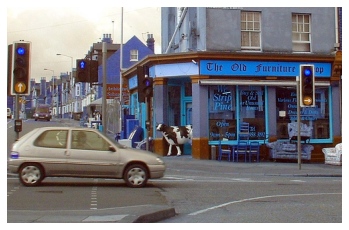

In [4]:
# imPath = os.path.join(imgRoot, dataType, imgInfo['file_name'])
imPath = os.path.join(dataType, imgInfo['file_name'])
im = cv2.imread(imPath)
plt.imshow(im);
plt.axis('off')
# plt.show()

Image 555050 includes 1 annotations as follows:[184327]


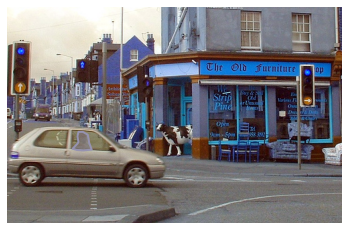

In [5]:
plt.imshow(im); plt.axis('off')

# take the anns ID of this image 
annIds = coco.getAnnIds(imgIds=imgInfo['id'])  

anns = coco.loadAnns(annIds)
print(f'Image {imgInfo["id"]} includes {len(anns)} annotations as follows:{annIds}')
coco.showAnns(anns)

ann184327 mask as follows：


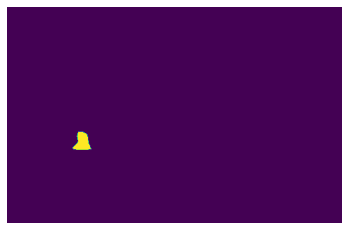

In [6]:
print(f'ann{annIds[0]} mask as follows：')
mask = coco.annToMask(anns[0])
plt.imshow(mask); plt.axis('off')
plt.show()

### Reference
- https://blog.csdn.net/u013832707/article/details/94445495
- https://linzhenyuyuchen.github.io/2020/01/20/pycocotools/